In [122]:
import cv2
import time
import tomopy 
import matplotlib.pyplot as plt
import numpy as np
import dxchange as dx
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from array import *
rec = dict()

(1, 128, 128)


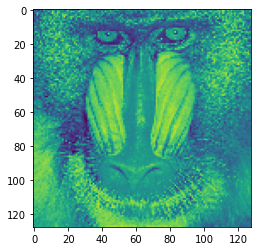

In [123]:
obj = tomopy.baboon(size=128)
print(obj.shape)
plt.figure()
plt.imshow(obj[0])
plt.show()

In [124]:
ang = tomopy.angles(nang=120, ang1=0, ang2=180)


In [125]:
prj = tomopy.project(obj, ang, pad=True)

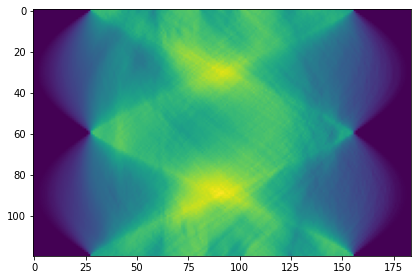

In [126]:
plt.figure(tight_layout=True)
plt.imshow(prj[:, 0, :])
plt.show()

In [127]:
prj_poisson = tomopy.add_poisson(prj/10)*100



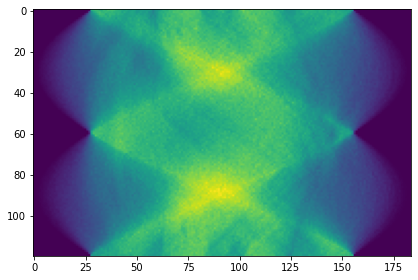

In [128]:
plt.figure(tight_layout=True)
plt.imshow(prj_poisson[:, 0, :])
plt.show()

In [129]:
def add_rings(tomo, std=0.005):
    new_tomo = np.copy(tomo)
    sensitivity = np.random.normal(loc=1, scale=std, size=(1, new_tomo.shape[1], new_tomo.shape[2]))
    new_tomo = new_tomo * sensitivity
    return new_tomo


In [130]:
prj_screwed_up = add_rings(prj_poisson)

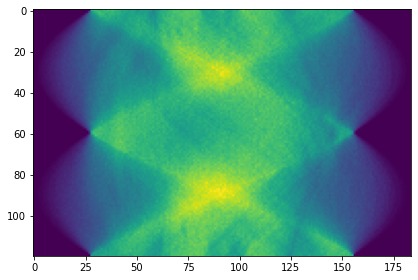

In [131]:
plt.figure(tight_layout=True)
plt.imshow(prj_screwed_up[:, 0, :])
plt.show()

In [132]:
def ten_dis (algorithm):
    arrays = dict();
    array_n = []
    array_t = []
    if algorithm != 'ospml_hybrid2':
        for x in range(0,15):
            tic = time.perf_counter()
            array_n.append(tomopy.recon(prj_screwed_up, ang, num_gridx=128, algorithm = algorithm, num_gridy=128, num_iter= 2*x+2))
            toc = time.perf_counter()
            array_t.append(toc-tic)
    else:
        for x in range(0,15):
            tic = time.perf_counter()
            array_n.append(tomopy.recon(prj_screwed_up, ang, algorithm = 'ospml_hybrid', num_gridx = 128, num_gridy=128, num_iter=2*x+2, reg_par = [.1, .1], num_block=10))
            toc = time.perf_counter()
            array_t.append(toc-tic)
    arrays['time'] = array_t
    arrays['iterations'] = array_n
    return arrays

In [133]:
def dis_time (algorithm)

SyntaxError: invalid syntax (<ipython-input-133-d90f998b8383>, line 1)

In [135]:

#rec['art1'] = tomopy.recon(prj_screwed_up, ang, num_gridx=128, algorithm = 'art', num_gridy=128, num_iter=10)
#rec['art1'] = tomopy.recon(prj, ang, num_gridx=128, algorithm = 'art', num_gridy=128, num_iter=10)

#rec['mlem1'] = tomopy.recon(prj_screwed_up, ang, num_gridx=128, algorithm = 'mlem', num_gridy=128, num_iter=10)
#rec['mlem2'] = tomopy.recon(prj, ang, num_gridx=128, algorithm = 'mlem', num_gridy=128, num_iter=10)

#rec['ospml_hybrid1'] = tomopy.recon(prj_screwed_up, ang, algorithm = 'ospml_hybrid', num_gridx = 128, num_gridy=128, num_iter=20, reg_par = [.1, .1], num_block=10)
#rec['ospml_hybrid2'] = tomopy.recon(prj, ang, algorithm = 'ospml_hybrid', num_gridx = 128, num_gridy=128, num_iter=20, reg_par = [.1, .1], num_block=10)
rec['art'] = ten_dis('art')
rec['mlem']= ten_dis('mlem')
rec['ospml_hybrid'] = ten_dis('ospml_hybrid')

Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstruc

In [118]:
for x in range(0, 10):
    print(x)

0
1
2
3
4
5
6
7
8
9


(1, 128, 128)


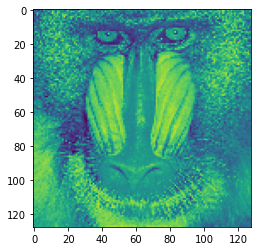

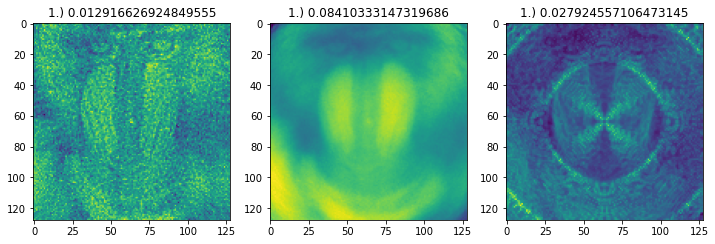

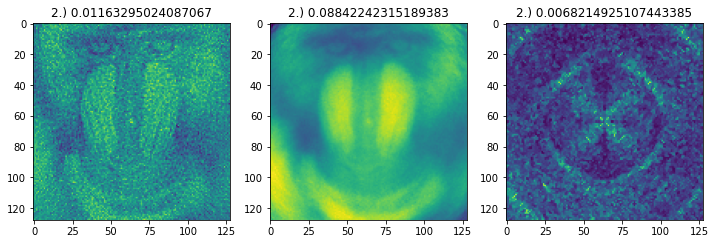

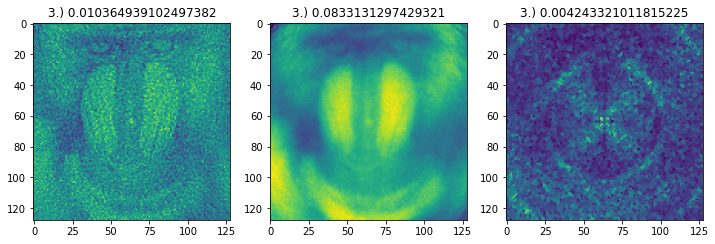

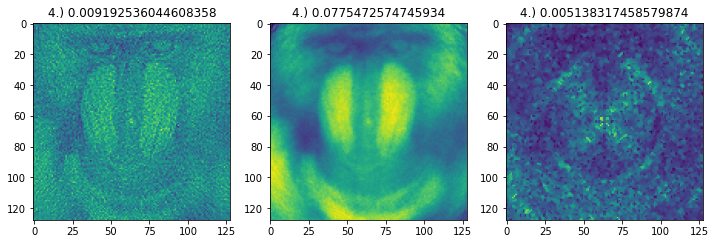

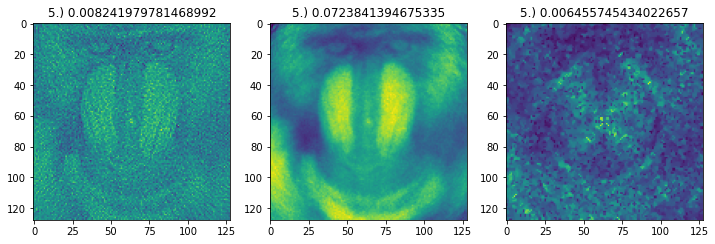

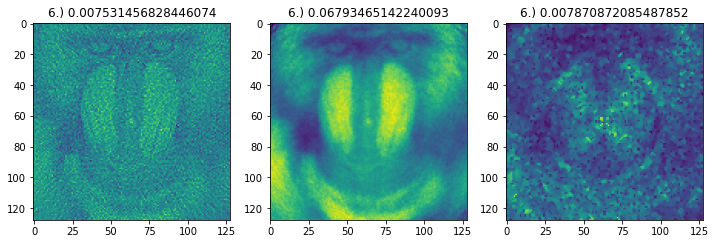

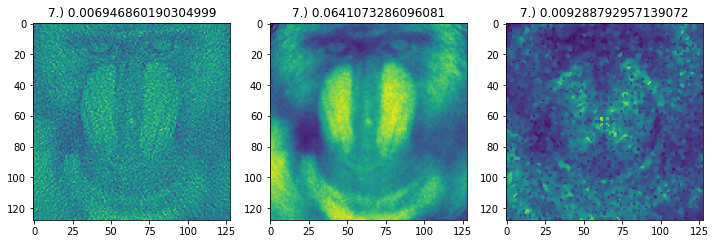

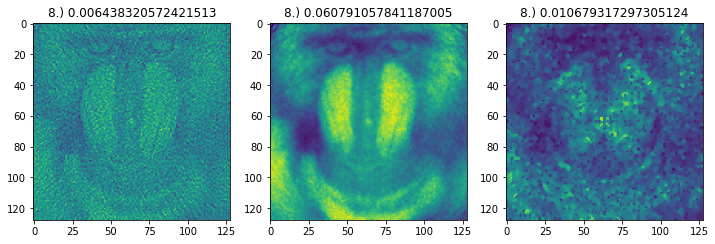

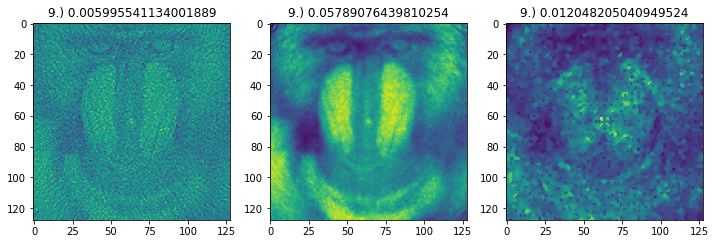

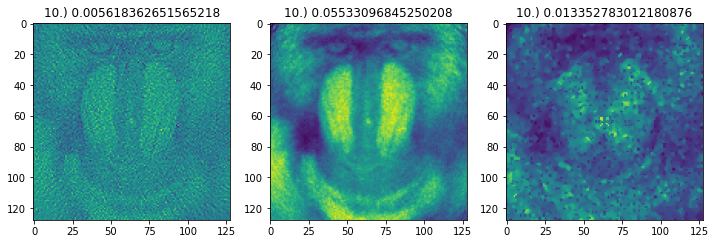

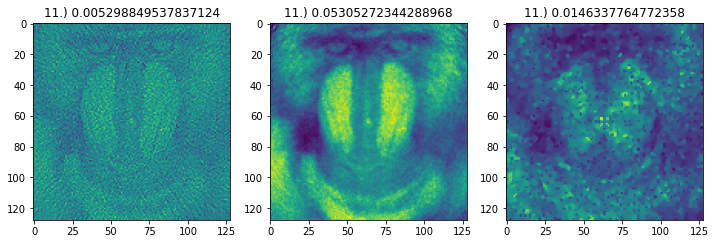

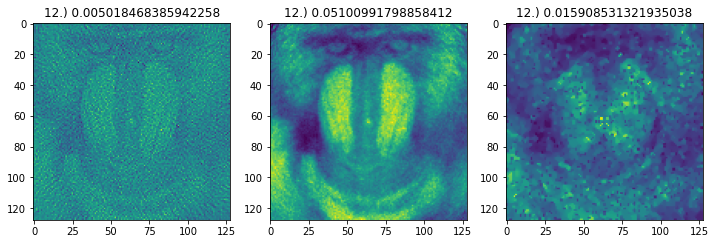

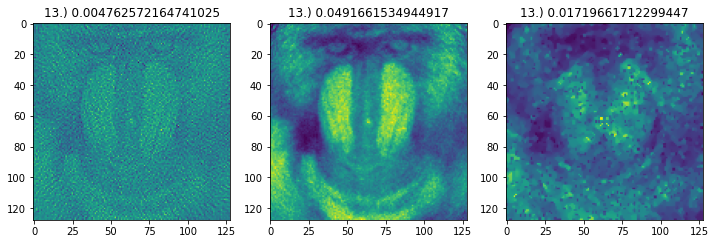

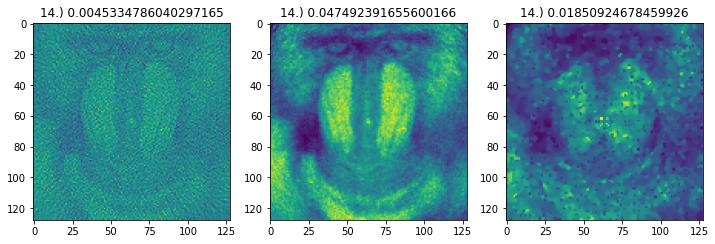

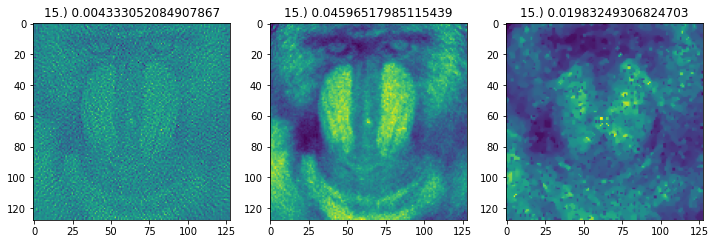

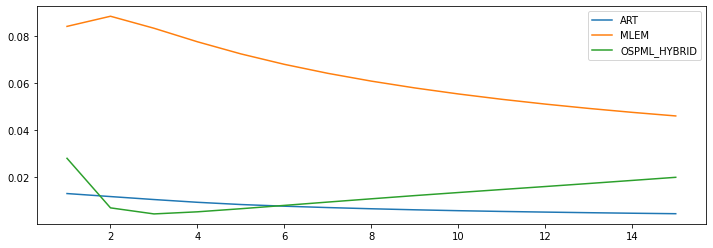

In [141]:
art_array = []
mlem_array = []
ospml_hybrid_array = []
obj = tomopy.baboon(size=128)
print(obj.shape)
plt.figure()
plt.imshow(obj[0])
plt.show()
for x in range(0,45):
    if x%3==0:
        plt.figure(figsize=(12,4))
        plt.subplot(131+x%3)
        plt.imshow(rec['art']['iterations'][int(x/3)][0])
        str1 = str(int(x/3)+1)
        str1 += '.) '
        str1 += str(ssim(obj[0], rec['art']['iterations'][int(x/3)][0]))
        plt.title(str1)
        art_array.append(ssim(obj[0], rec['art']['iterations'][int(x/3)][0]))


    if x%3==1:
        plt.subplot(131+x%3)
        plt.imshow(rec['mlem']['iterations'][int(((x-x%3)/3))][0])
        str1 = str(int(((x-x%3)/3)+1))
        str1+= '.) '
        str1 += str(ssim(obj[0], rec['mlem']['iterations'][int(((x-x%3)/3))][0]))
        plt.title(str1)
        mlem_array.append(ssim(obj[0], rec['mlem']['iterations'][int(((x-x%3)/3))][0]))


    if x%3==2:
        plt.subplot(131+x%3)
        plt.imshow(rec['ospml_hybrid']['iterations'][int(((x-x%3)/3))][0])
        str1 = str(int((x-x%3)/3)+1)
        str1 += '.) '
        str1 += str(ssim(obj[0], rec['ospml_hybrid']['iterations'][int(((x-x%3)/3))][0]))
        plt.title(str1)
        ospml_hybrid_array.append(ssim(obj[0], rec['ospml_hybrid']['iterations'][int(((x-x%3)/3))][0]))

        
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]  
plt.figure(figsize=(12,4))
plt.plot(X, art_array, label= 'ART')
plt.plot(X, mlem_array, label= 'MLEM')
plt.plot(X, ospml_hybrid_array, label= 'OSPML_HYBRID')
plt.legend()
plt.show()

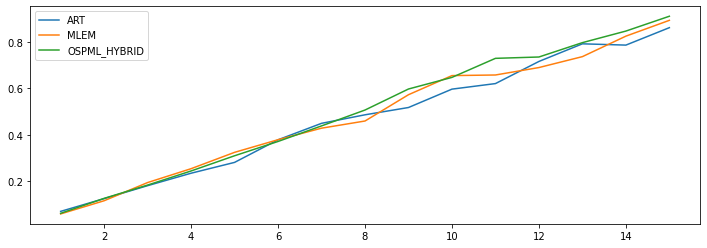

In [140]:
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]  
plt.figure(figsize=(12,4))
plt.plot(X, rec['art']['time'], label= 'ART')
plt.plot(X, rec['mlem']['time'], label = 'MLEM' )
plt.plot(X, rec['ospml_hybrid']['time'], label = 'OSPML_HYBRID')
plt.legend()
plt.show()

In [92]:
#art_array = []
#mlem_array = []
#ospml_hybrid_array = []
#plt.subplot(131)
#plt.imshow(rec['art1'][0])
#plt.title('Art with Rings and Poisson noise')
#plt.subplot(132)
#plt.imshow(rec['art2'][0])
#plt.title('Art without')
#plt.subplot(133)
#plt.imshow(rec['mlem1'][0])
#plt.title('MLEM with Rings and Poisson noise')
#plt.figure(figsize=(12,4))
#plt.subplot(131)
#plt.imshow(rec['mlem2'][0])
#plt.title('MLEM without')
#plt.subplot(132)
#plt.imshow(rec['ospml_hybrid1'][0])
#plt.title('OSMPL_HYBRID with Rings and Poisson noise')
#plt.subplot(133)
#plt.imshow(rec['ospml_hybrid2'][0])
#plt.title('OSMPL_HYBRID without')
#for x in range (0, 45):
 #   b=0
  #  r=0
   # h=0
    #if x%3==0:
     #   plt.figure(figsize=(12,4))
      #  plt.subplot(131+x%3)
       # plt.imshow(rec['art'][b][0])
       # plt.title(x+1)
        #b+=1
    #elif x%3==1:
     #   plt.subplot(131+x%3)
      #  plt.imshow(rec['mlem'][r][0])
       # plt.title(x+1)
       # r+=1
   # elif x%3==2:
    #    plt.subplot(131+x%3)
     # plt.imshow(rec['ospml_hybrid'][h][0])
      # plt.title(x+1)
        #h+=1

#for x in range(0,15):
 #   if x%3==0:
  #      plt.figure(figsize=(12,4))
   # plt.subplot(131+x%3)
    #plt.imshow(rec['art'][x][0])
    #str1 = str(x+1)
    #str1 += '.) '
    #str1 += str(ssim(obj[0], rec['art'][x][0]))
    #plt.title(str1)
    #art_array.append(ssim(obj[0], rec['art'][x][0]))

#for x in range(0,15):
 #   if x%3==0:
  #      plt.figure(figsize=(12,4))
   # plt.subplot(131+x%3)
    #plt.imshow(rec['mlem'][x][0])
    #str1 = str(x+1)
    #str1+= '.) '
    #str1 += str(ssim(obj[0], rec['mlem'][x][0]))
    #plt.title(str1)
    #mlem_array.append(ssim(obj[0], rec['mlem'][x][0]))

#for x in range(0,15):
 #   if x%3==0:
  #      plt.figure(figsize=(12,4))
   # plt.subplot(131+x%3)
    #plt.imshow(rec['ospml_hybrid'][x][0])
    #str1 = str(x+1)
    #str1 += '.) '
    #str1 += str(ssim(obj[0], rec['ospml_hybrid'][x][0]))
    #plt.title(str1)
    #ospml_hybrid_array.append(ssim(obj[0], rec['ospml_hybrid'][x][0]))


    
#X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]  
#plt.figure(figsize=(12,4))
#plt.plot(X, art_array, label= 'Art')
#plt.plot(X, mlem_array, label= 'MLEM')
#plt.plot(X, ospml_hybrid_array, label= 'ospml_hybrid')
#plt.legend()
#plt.show()

SyntaxError: can't assign to operator (<ipython-input-92-80aa80e9fc1d>, line 73)

From the three different algorithims, we see that ART tends to do better with clearer images, MLEM not as on the ideal case although better with worse data, and OSMPL_HYBRID somewere imbetween. 